<h1 align = "center" style = "color:gold"> Regular Falsi Method </h1>

---

In [4]:
# Import necessary modules
import numpy as np 
import matplotlib.pyplot as plt
try:
    plt.style.use(["science", "notebook", "grid"])
except:
    # Install scienceplots
    print("SciencePlots not installed. Installing...")
    import subprocess
    subprocess.run(["pip", "install", "scienceplots"])
    import scienceplots
    plt.style.use(["science", "notebook", "grid"])

The Regula Falsi method, also known as the false position method, is a numerical method for finding the roots of a continuous function. It's an iterative method that combines aspects of the bisection method and the secant method. Here's a detailed explanation of the Regula Falsi method, including its algorithm steps, time complexity, and space complexity:

<img src = "../Regular_Falsi_method/images/Regula_falsi.gif">

<h2 align = "center" style = "color:red"> Regular falsi Method = Bisection Method + Secant Method </h2>

### Algorithm Steps

1. **Initial Setup**: Choose two initial points $a$ and $b$ such that $f(a)$ and $f(b)$ have opposite signs. This implies that there is at least one root in the interval $[a, b]$.

2. **Compute the False Position**: Calculate the point $c$ using the formula:

   $$ c = a - \frac{f(a) \times (b - a)}{f(b) - f(a)} $$

   This formula gives a point $c $ which is the intersection of the x-axis and the line joining the points $(a, f(a)) $ and $(b, f(b)) $.

3. **Check for Convergence**: Evaluate $f(c) $. If $f(c) $ is close enough to zero (within a pre-defined tolerance), or if the maximum number of iterations is reached, then stop and return $c $ as the root.

4. **Update the Interval**: Depending on the sign of $f(c)$:
   
   - If $f(a) \times f(c) < 0$, the root lies between $a$ and $c $. Update $b = c$.
   - If $f(b) \times f(c) < 0$, the root lies between $c$ and $b $. Update $a = c$.

5. **Repeat**: Go back to step 2 and repeat until convergence criteria are met.

In [7]:
def regular_falsi(f, lower_lim:float, upper_lim:float, n_iter: int = 1000, tol:float = 1e-8, 
                  verbose:bool = True, noise:float = 1e-8) -> float:
    """Find the root of a function using the regular falsi method.
    Args:
        f: Function to find the root of.
        lower_lim: Lower limit of the interval. The function has negative value at this point.
        upper_lim: Upper limit of the interval. The function has positive value at this point.
        n_iter: Maximum number of iterations. Defaults to 1000.
        tol: Tolerance of the solution. Defaults to 1e-6.
        verbose: If True, print the number of iterations and the root. Defaults to True.
        noise: Small value added to the false position to avoid division by zero. Defaults to 1e-8.
    Returns:
        The root of the function.
    """
    if f(lower_lim) * f(upper_lim) > 0:
        if f(lower_lim) == 0:
            return lower_lim # If the lower limit is a root, return it
        else:
            # If the function has the same sign at the limits, the root is not in the interval
            raise ValueError("The function must have opposite signs at the limits.")
    
    for iter in range(n_iter):
        # Calculate the false position
        ## Check if the denominator is zero
        false_position = lower_lim - (f(lower_lim) * (lower_lim - upper_lim)) / (f(lower_lim) - f(upper_lim))

        # Check if the root is found
        try:
            new_f = f(false_position)
        ## If the denominator is zero, add a small value to the false position to avoid division by zero
        except ZeroDivisionError:
            false_position += noise
            new_f = f(false_position)
        if abs(new_f) < tol:
            if verbose:
                print(f"Found root at {false_position} after {iter} iterations.")
            return false_position
        
        # Check if the sign of f(lower_lim) and f(false_position) are the same
        elif f(false_position) * f(lower_lim) < 0:
            upper_lim = false_position # if sign is different, the root is in the interval [lower_lim, false_position]
        else:
            lower_lim = false_position # if sign is the same, the root is in the interval [false_position, upper_lim]

    raise ValueError(f"Could not find root after {n_iter} iterations.")

### Time Complexity

- The time complexity of the Regula Falsi method is not straightforward to define as it depends on the function and the initial guesses. In general, it has a slower convergence than Newton's method but can be more stable.
- Each iteration involves a constant number of arithmetic operations, but the number of iterations to reach convergence can vary significantly.

### Space Complexity

- The space complexity is $O(1) $ as the method only requires storing a finite number of variables regardless of the size of the input (initial points and function values).


### Function Analysis

- **Robustness**: With the addition of the `noise` parameter and error handling, the function can now better handle edge cases, making it more robust for a variety of functions.
- **User-Friendly**: The `verbose` parameter makes the function more adaptable to different use cases, such as educational purposes where detailed output is beneficial, or algorithmic applications where silent running is preferred.
- **Error Handling**: The function continues to handle errors effectively, ensuring that it only operates on intervals where a root exists.

### Considerations

- **Noise Parameter**: While adding `noise` helps avoid division by zero, it can potentially alter the accuracy of the method slightly. It's a trade-off between robustness and precision.
- **Documentation**: Ensure that the documentation (docstring) is updated to reflect these new features and their purpose. This will help users understand how and when to use these parameters.

## Visualization

Found root at 2.094551480660762 after 245 iterations.
The root of the function is 2.0946
The function value at the root is -0.0000


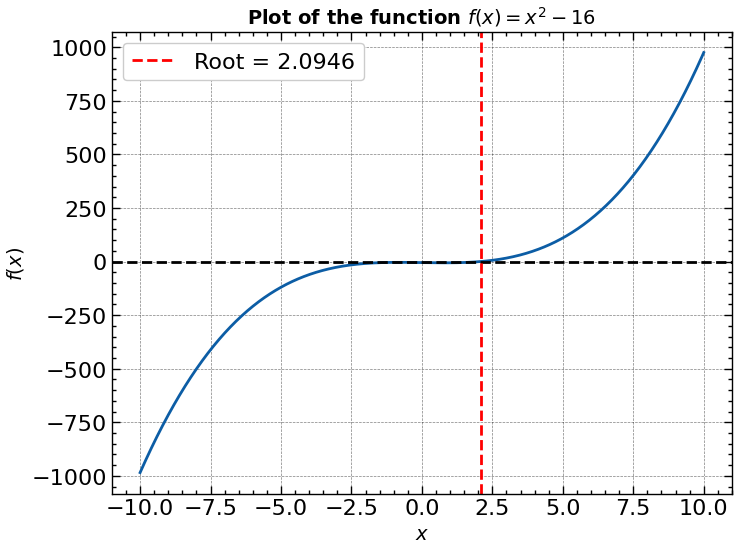

In [8]:
test_func = lambda x : x ** 3 - 2 * x - 5
x : np.ndarray = np.linspace(-10, 10, 1000)

# Find the root of the function
LOWER_LIM : float = -10
UPPER_LIM : float = 10
root : float = regular_falsi(test_func, LOWER_LIM, UPPER_LIM, verbose=True)
print(f"The root of the function is {root:.4f}")
print(f"The function value at the root is {test_func(root):.4f}")

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, test_func(x))
plt.axhline(0, color="black", linestyle="--")
plt.axvline(root, color="red", linestyle="--", label=f"Root = {root:.4f}")
plt.xlabel("$x$", fontsize=14, fontweight="bold")
plt.ylabel("$f(x)$", fontsize=14, fontweight="bold")
plt.title("Plot of the function $f(x) = x^2 - 16$", fontsize=14, fontweight="bold")
plt.legend();

### Theoretical Questions
---

1. **Basic Understanding**:
   - Explain the Regular Falsi method. How does it differ from the Bisection and Newton-Raphson methods?

2. **Convergence Criteria**:
   - Discuss the convergence criteria of the Regular Falsi method. Under what conditions does this method fail to converge?

3. **Mathematical Foundation**:
   - Derive the formula used in the Regular Falsi method to find the false position. How does this formula ensure approximation to the root of the function?

4. **Comparison with Other Methods**:
   - Compare the efficiency of the Regular Falsi method with the Secant method. In what scenarios might one be preferred over the other?

5. **Handling Special Cases**:
   - How can the Regular Falsi method be modified to handle functions that touch but do not cross the x-axis?

6. **Error Analysis**:
   - Discuss the types of errors that can occur in the Regular Falsi method and how they can be minimized.

### Practical Questions
---

1. **Implementing the Method**:
   - Write a Python function to implement the Regular Falsi method. Test your function with the equation $$x^3 - x - 2 = 0$$.

2. **Real-world Application**:
   - Apply the Regular Falsi method to find the interest rate at which the present value of a series of cash flows equals a given amount. Assume a series of annual cash flows.

3. **Modification for Faster Convergence**:
   - Modify your Regular Falsi implementation to handle a case where the function only touches the x-axis. Demonstrate this with the function $$f(x) = x^2$$.

4. **Comparative Analysis**:
   - Use the Regular Falsi method and the Newton-Raphson method to find the root of $$f(x) = \sin(x) - x/2$$. Compare the number of iterations required and the accuracy of the results.

5. **Handling Errors**:
   - Implement error handling in your Regular Falsi method to deal with situations such as division by zero and absence of a root in the given interval.

6. **Graphical Representation**:
   - Create a Python script that plots the function $$f(x) = x^3 - 6x^2 + 11x - 6.1$$ and visually demonstrates how the Regular Falsi method approximates the root.